2. What is credit risk?
What exactly is credit risk? Credit risk is the risk that someone who has borrowed money will not repay it all. Think of this risk as the difference between lending money to a person and purchasing a government bond. With government bonds, it's almost guaranteed to be paid back, but not when lending money to people. A loan is in default when the lending agency is reasonably certain the loan will not be repaid. We will use machine learning models to determine this.

3. What is credit risk?
Consider this example: we've loaned 300 dollars to someone who has made two payments but not the final payment. It is at this point we consider the loan to be in default. Predicting this beforehand is useful for us to estimate expected loss.

4. Expected loss
The expected loss is the amount that the firm loses as a result of the default on a loan. Expected loss is a simple calculation of the following three components. The probability of default, which is the likelihood someone will default on a loan. The exposure at default which is the amount outstanding at the time of default. And the loss given default which is the ratio of the exposure against any recovery from the loss. From our example the 100 dollars we were owed is our exposure, and if we sell that debt for 20 dollars, our loss given default would be 80 percent. The formula for expected loss is probability of default times exposure at default and loss given default. This course will focus on probability of default.

Expected_Loss = PD * EAD * LGD

5. Types of data used
For modeling probability of default we generally have two primary types of data available. The first is application data, which is data that is directly tied to the loan application like loan grade. The second is behavioral data, which describes the recipient of the loan, such as employment length.

6. Data columns
The data we will use for our predictions of probability of default includes a mix. This is important because application data alone is not as good as application and behavioral data together. Included are two columns which emulate data that can be purchased from credit bureaus. Acquiring external data is a common practice in most organizations. These are the columns available in the data set. Some examples are: personal income, the loan amount's percentage of the person's income, and credit history length. Consider the percentage of income. This could affect loan status if the loan amount is more than their income, because they may not be able to afford payments.

7. Exploring with cross tables
Our data has 32 thousand rows, which can be difficult to see all at once. Here is where we use cross tables using the crosstab function available within Pandas. We can use this function to help get a high level view of the data similar to pivot tables in Excel. Here, we see the data has been grouped by loan status and home ownership, and then the average interest rate has been calculated.

8. Exploring with visuals
In addition to using cross tables, we can explore the data set visually. Here, we use matplotlib to create a scatter plot of the loan's interest rate and the recipient's income. Just like the cross table, plots help us get a high level view of our data.

One could have more columns within the data, and many could have a relationship with the values in loan_status. One needs to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps in better understanding what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [1]:
# -*- coding: utf-8 -*-

#####################################################
### Import all neccesary functions and libraries. ###
#####################################################

print("Setting up...")
#import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

Setting up...


In [2]:
cr_loan = pd.read_csv("Raw_Credit_Data.csv")
cr_loan_clean = pd.read_csv("Credit_Data_Cleaned.csv")
cr_loan_ready4Modelling = pd.read_csv("Credit_Data_ReadyForModelling.csv")

# The structure
print(cr_loan.dtypes)

# The first five rows
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D

Explore the credit data

Begin by looking at the data set cr_loan. In this data set, loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.

One can have more columns within the data, and many could have a relationship with the values in loan_status. One needs to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps in better understanding what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

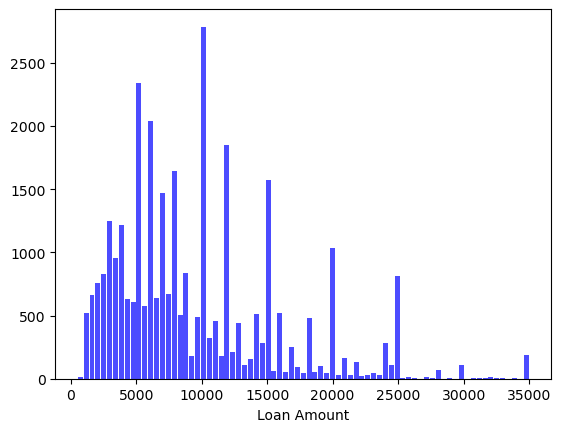

In [3]:
# The distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

One can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.

Crosstab and pivot tables - Often financial data is viewed as a pivot table

With Cross tables, One can get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

One will be able to see how the values are populated throughout the data, and visualize them. One need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.


In [4]:
# A cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [5]:
# A cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [6]:
# A cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


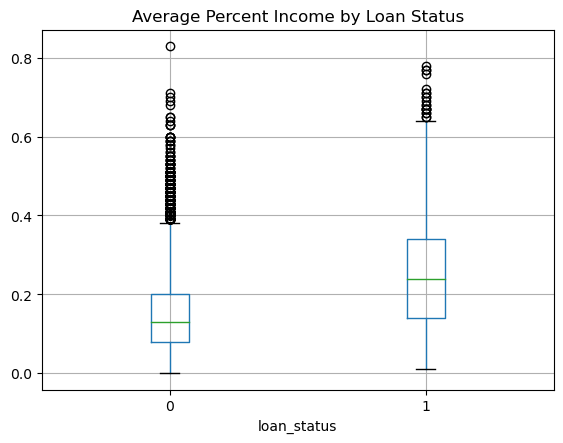

In [7]:
# A box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

1. Outliers in Credit Data
Now that we've performed some basic exploration of the data, let's take a closer look at some of the columns and begin preparing it for modeling.

2. Data processing
As with any machine learning problem, data preparation is the first step. But why? When our data is properly prepared we reduce the training time of our machine learning models. Also, prepared data can also have a positive impact on the performance of our model. This is important because we want our models to predict defaults correctly as often as possible. Consider this ROC chart. This shows the accuracy of three different models on the same data throughout different stages of processing. The light blue line represents a model trained on tidy and prepared data, while the orange line's model trained on raw data. The light blue line represents the most accurate model, because the curve is closest to the top left corner. We will see more graphs like this later when we check the accuracy of our models.

3. Outliers and performance
The first type of preparation we will look at is outlier detection and removal. Unfortunately, data entry systems producing bad data is fairly common. If the data entry specialist was tired or distracted, they can enter incorrect values into our system. It's also possible for data ingestion tools to create erroneous values in our data as a result of technical problems or system failures.

4. Outliers and performance
With outliers in our training data, our predictive models will have a difficult time estimating parameters like coefficients. This can cause our models to not predict as many defaults. Think of the coefficients as how much each column or feature is weighted to determine the loan status. Notice the coefficient differences in this example. It's possible that outliers in interest rate can cause that column to be weighted much more than normal. This will affect predictions.

5. Detecting outliers with cross tables
One way we can detect outliers, is to use cross tables with aggregate functions like those from the previous video. Here, we call crosstab on our credit loan data just like before to find the average interest rate. For this example, we might expect to see the values on the left with our normal data. However, there could be some extreme outliers in the data which would result in the data on the right. This would cause problems with modeling. Imagine having an interest rate of 59,000 percent!

6. Detecting outliers visually
Another way to detect outliers is to use visuals. For this we can easily use plots like histograms and scatter plots, which we saw in the previous video. Here, we can see that a couple records have a person's employment length set at well over 100. This would suggest that two loan applicants are over 136 years old! This, for now at least, is not possible.

7. Removing outliers
So, we know outliers are a problem and want to remove them, but how? We can easily use the drop method within the pandas package to remove rows from our data. In this example, we first use basic python subsetting to find rows with a person's employment length greater than 60. What this returns is the index position of that row in our data frame. From there, we call the drop method on our data frame to have it remove the rows in the data frame which match the index positions found earlier. Now, we can see visually that the outliers have been removed according to our criteria, and the data looks much more realistic

Finding outliers with cross tables
Now you need to find and remove outliers you suspect might be in the data. For this exercise, you can use cross tables and aggregate functions.

Have a look at the person_emp_length column. You've used the aggfunc = 'mean' argument to see the average of a numeric column before, but to detect outliers you can use other functions like min and max.

It may not be possible for a person to have an employment length of less than 0 or greater than 60. You can use cross tables to check the data and see if there are any instances of this!

In [8]:
# The cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'], values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [9]:
# An array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

In [10]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [11]:
# The cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


Visualizing credit outliers

You discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

Visualizing the data here can be another easy way to detect outliers. You can use other numeric columns like loan_amnt and loan_int_rate to create plots with person_age to search for outliers.

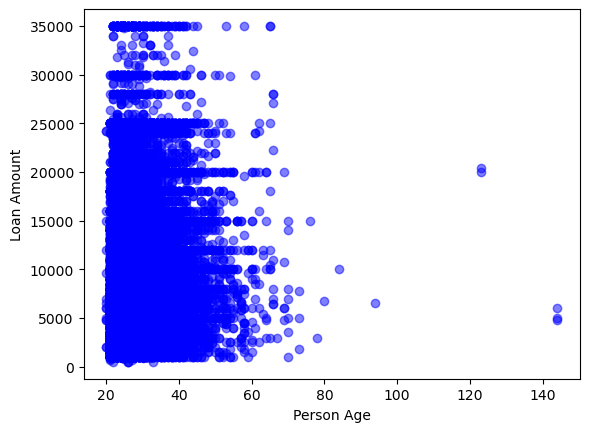

In [12]:
# The scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

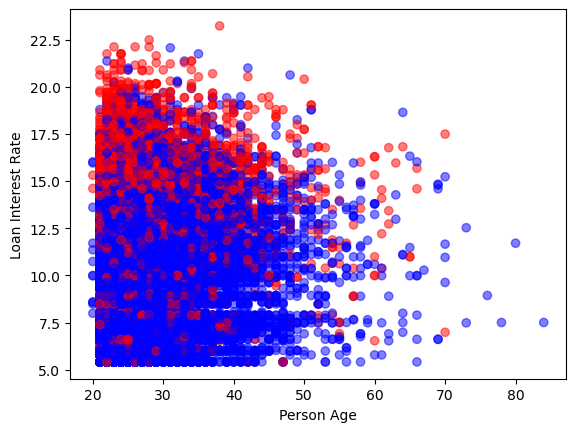

In [13]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'], c = cr_loan_new['loan_status'], cmap = cm.colors.ListedColormap(colors), alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

.drop() those rows like they're hot! Notice that in the last plot we have loan_status as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.

1. Risk with missing data in loan data
With the outliers now removed from our data set, we can now focus on another problem with credit data and that is when data is missing.

2. What is missing data?
Normally, you might think of missing data as when an entire row is missing, but that is not the only way data can be missing. Data can be missing when there are null values in place of actual values. It can also be an empty string instead of a real string. For this course, we will refer to missing data as when specific values are not present, not when entire rows of data are missing. Any of the columns within our data can contain missing values. If we see a row of data with missing values in a Pandas dataframe, it will look something like this. Notice for employment length we see NAN, or not a number, instead of a value.

3. Similarities with outliers
One issue with missing data is similar to problems caused with outliers in that it negatively impacts predictive model performance. It can bias our model in unanticipated ways, which can affect how we predict defaults. This could result in us predicting a large number of defaults that are not actually defaults because the model is biased towards defaults. Also, many machine learning models in Python do not automatically ignore missing values, and will often throw errors and cease training.

4. Similarities with outliers
Here are some examples of missing data and possible results. If there are null values in numeric or string columns, the model will throw an error.

5. How to handle missing data
So, how do we handle missing data? Most often, it is handled in one of three ways. Sometimes we need to replace missing values. This could be replacing a null with the average value of that column. Other times we remove the row with missing data all together. For example, if there are nulls in loan amount, we should drop those rows entirely. We sometimes keep missing values as well. This, however, is not the case with most loan data. Understanding the data will direct you towards one of these three actions.

6. How to handle missing data
For example, if the loan status is null, it's possible that the loan was recently processed in our system. Sometimes there is a data delay, and additional time needed for processing. In this case, we should just remove the whole row. Another example is where the person's age is missing. Here, we might be able to replace the missing age values with the median of everyone's age.

7. Finding missing data
But how do we find missing data? With Pandas, we can find missing data like nulls using the isnull function and the sum function to count the rows with data missing. By combining the functions isnull, sum, and any, we count all the null values in each column. This produces a table of values show the count of records with nulls in the data.

8. Replacing Missing data
If we decide to replace missing data, we can call the fill-n-a method from Pandas along with aggregate functions. This will replace only missing values. In this example, we replace null interest rates with the average of all interest rates in the data. The result, as shown here, replaces a null interest rate with 11 percent.

9. Dropping missing data
Dropping rows with missing data is just like dropping rows with outliers. We use the drop method from Pandas. Here, we find the rows with missing data using isnull, and then drop the rows from the data set entirely.

Replacing missing credit data
One should check for missing data. If missing data is found within loan_status, one would not be able to use the data for predicting probability of default because you wouldn't know if the loan was a default or not. Missing data within person_emp_length would not be as damaging, but would still cause training errors.

So, check for missing data in the person_emp_length column and replace any missing values with the median.

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

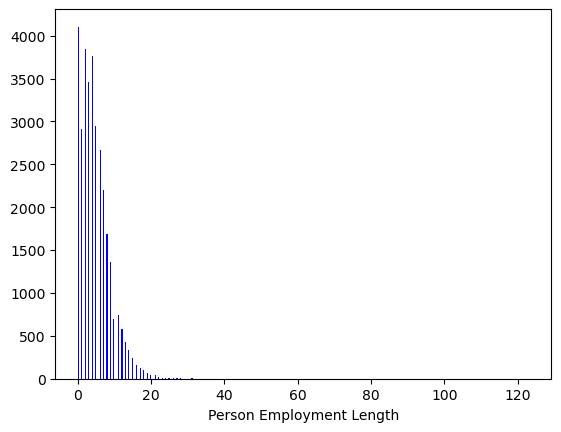

In [14]:
# Print an array of columns with null values
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Replace the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

one can use several different functions like mean() and median() to replace missing data. The goal here is to keep as much of our data as we can! 

Removing missing data
replaced missing data in person_emp_length, but in the previous cell , it can be seen that loan_int_rate has missing data as well.

Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.

Because interest rates are set by the company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you one cannot know for sure. For now, it's best to .drop() these records before moving forward.

In [15]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


Now that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work.

Missing data intuition

Here's an intuition check! When handling missing data, you have three options: keep, replace, and remove.

You've been looking at numeric columns, but what about a non-numeric column? How would you handle missing data in the column person_home_ownership which has string values?

The object ownership_table has already been created to show how many records occur in each unique value of person_home_ownership with the following code:

already have an all-inclusive class within person_home_ownership that stores all other types of home ownership as Other. With this, we eliminate missing data without affecting the data as a whole

1. Logistic regression for probability of default
Now that we've removed both outliers and missing data from out data set, we can begin modeling to predict the probability of default.

2. Probability of default
Recall that the probability of default is the likelihood that someone will fail to repay a loan. This is expressed as a probability which is a value between zero and one. These probabilities are associated with our loan status column where a 1 is a default, and a 0 is a non default.

3. Probability of default
The resulting predictions give us probabilities of default. The closer the value is to 1, the higher the probability of the loan being a default.

4. Predicting probabilities
To get these probabilities, we train machine learning models on our credit data columns, known as features, so the models learn how to use the data to predict the probabilities. These types of models are known as classification models, where the class is default or non-default. In the industry, two models are used frequently. These are logistic regressions, and decision trees. Both of these models can predict the probability of default, and tell us how important each column is for predictions.

5. Logistic regression
The logistic regression is like a linear regression but only produces a value between 0 and 1. Notice that the equation for the linear regression is actually part of the logistic regression. Logistic regressions perform better on data when what determines a default or non-default can vary greatly. Think about the y-intercept here, which is the log odds of non-default. This as another way of expressing the overall probability of non-default.

6. Training a logistic regression
In this course, we use the logistic regression within scikit learn. The use of the model is easy. Like any function, you can pass in parameters or not. The solver parameter is an optimizer, just like the solver in Excel. LBFGS is the default. To train the model, we call the fit method on it. Within the method, we have to provide the model with training columns and training labels. We use ravel from numpy to make the labels a one-dimensional array instead of a data frame. In our credit data, the training columns are every column except the loan status. The loan status contains the labels.

7. Training and testing
Generally, in machine learning, we split our entire data set into two individual data sets.

8. Training and testing
They are the training set and the test set. We use the majority of the data to train our models, so they learn as much as possible from the data. Our test set is used to see how our model reacts to new data that it has not seen before. This is like students learning in school. They will learn facts from one subject, and be tested on different facts from that same subject. This way, we can asses their mastery of the topic.

9. Creating the training and test sets
The first thing we do is separate our data into training columns and labels. Here, we have assigned those as X and Y. With that done, we use the test train split function within the sci-kit learn package. Let's have a look at the code. Remember how I said we need training columns and labels for our model? We need these for both the training set and the test set, which are all easily created with one line of code. Within this function, we set the percentage of the data to be used as a test set, and a number used as a random seed for reproducibility.

Logistic regression basics
You've now cleaned up the data and created the new data set cr_loan_clean.

Think back to the final scatter plot from chapter 1 which showed more defaults with high loan_int_rate. Interest rates are easy to understand, but what how useful are they for predicting the probability of default?

Since you haven't tried predicting the probability of default yet, test out creating and training a logistic regression model with just loan_int_rate. Also check the model's internal parameters, which are like settings, to see the structure of the model with this one column.

In [16]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]


Notice that the model was able to fit to the data, and establish some parameters internally. It's even produced an .intercept_ value like in the lecture

Multivariate logistic regression
Generally, one won't use only loan_int_rate to predict the probability of default. One will want to use all the data you have to make predictions.

With this in mind, try training a new model with different columns, called features, from the cr_loan_clean data. Will this model differ from the first one? For this, you can easily check the .intercept_ of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.

In [17]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


Take a closer look at each model's .intercept_ value. The values have changed! The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.

Creating training and test sets
You've just trained LogisticRegression() models on different columns.

You know that the data should be separated into training and test sets. test_train_split() is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

In addition to the intercept_, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default.

In [18]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


three columns were used for training and there are three values in .coef_? This tells you how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for loan_int_rate

1. Predicting the probability of default
So far, we've trained a logistic regression on our credit data, and looked some attributes of the model. Now, let's discuss the structure of the model and how to create predictions.

2. Logistic regression coefficients
In the previous exercise, we saw the following intercept and coefficients for our model. These coefficients the importance of each column. These values are part of the logistic regression formula that calculates the probability of default which we see here. Each coefficient is multiplied by the values in the column, and then added together along with the intercept. Then, 1 is divided by the sum of 1 and e to the negative power of our intercept coefficient sums. The result is the probability of default.

3. Interpreting coefficients
Consider employment length as an example. I've already calculated the intercept and coefficient for a logistic regression using this one column. What this coefficient tells us is the log odds for non-default. This means that for every 1 year increase in employment length, the person is less likely to default by a factor of the coefficient.

4. Interpreting coefficients
Let's say we have 3 values for employment length, and we want to know how this affects our probability of default by looking at the coefficients. What we see here is that the higher a person's employment length is, the less likely they are to default.

5. Using non-numeric columns
Since we're talking about numbers, it's worth mentioning that so far we have only used numeric columns to train out models. Our data also contains non-numeric columns like loan intent, which uses words to describe how the person plans to use the money we lend them. In Python, unlike R, machine learning models do not know how to use these non-numeric values. So, we have to perform an operation called one-hot encoding before we can use them.

6. One-hot encoding
One-hot encoding sounds complicated, but it's really simple. The main idea is to represent a string with a numeric value. Here is how it works. Let's think about the loan intent column where each loan has it's own intent value as a string. This sample has education, medical, and venture.

7. One-hot encoding
With one-hot encoding, we get a new set of columns where each value from loan intent is now it's own column. Each new column is created by separating out the loans with each intent value and making the new column's value a 0 or 1. For example, if the loan intent was education, it is now represented with a 1 in the loan intent education column. This way, there is one hot value.

8. Get dummies
To one-hot encode our string columns, we use the get dummies function within pandas. First, we separate the numeric and non-numeric columns from the data into two sets. Then we use the get dummies function to one-hot encode only the non-numeric columns. We union the two sets and the result is a full data set that's ready for machine learning!

9. Predicting the future, probably
Once our model is trained, we use the predict proba method on test data to make predictions. This creates a set of probabilities for non-default and default. Notice the output is a series of numbers between 0 and 1. We have two for each loan. The first number is the probability of non-default, and the second number is the probability of default.

Changing coefficients
With this understanding of the coefficients of a LogisticRegression() model, have a closer look at them to see how they change depending on what columns are used for training. Will the column coefficients change from model to model?

You should .fit() two different LogisticRegression() models on different groups of columns to check. You should also consider what the potential impact on the probability of default might be.

In [19]:
X1_train = cr_loan_clean[['person_income','person_emp_length','loan_amnt']]
X2_train = cr_loan_clean[['person_income','loan_percent_income','cb_person_cred_hist_length']]
y_train  = cr_loan_clean[['loan_status']]

In [20]:
# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

   person_income  person_emp_length  loan_amnt
0          59000              123.0      35000
1           9600                5.0       1000
2           9600                1.0       5500
3          65500                4.0      35000
4          54400                8.0      35000
   person_income  loan_percent_income  cb_person_cred_hist_length
0          59000                 0.59                           3
1           9600                 0.10                           2
2           9600                 0.57                           3
3          65500                 0.53                           2
4          54400                 0.55                           4
[[-4.05677209e-05 -2.44520318e-08  1.07020754e-04]]
[[-2.19487386e-05  8.96410766e-11 -1.64767901e-09]]


Notice that the coefficient for the person_income changed when we changed the data from X1 to X2. This is a reason to keep most of the data like we did in chapter 1, because the models will learn differently depending on what data they're given!

One-hot encoding credit data
It's time to prepare the non-numeric columns so they can be added to your LogisticRegression() model.

Once the new columns have been created using one-hot encoding, you can concatenate them with the numeric columns to create a new data frame which will be used throughout the rest of the course for predicting probability of default.

Remember to only one-hot encode the non-numeric columns. Doing this to the numeric columns would create an incredibly wide data set!

The credit loan data, cr_loan_clean, has already been loaded in the workspace.

In [21]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


all those columns! If you've ever seen a credit scorecard, the column_name_value format should look familiar.

Predicting probability of default
All of the data processing is complete and it's time to begin creating predictions for probability of default. You want to train a LogisticRegression() model on the data, and examine how it predicts the probability of default.

So that you can better grasp what the model produces with predict_proba, you should look at an example record alongside the predicted probability of default. How do the first five predictions look against the actual values of loan_status?


In [22]:
# Create the X and y data sets
X_new = cr_loan_prep[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y_new = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=.4, random_state=123)


In [23]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train_new, np.ravel(y_train_new))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test_new)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test_new.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.129805
1            0      0.243161
2            0      0.100325
3            0      0.252148
4            0      0.377654


some predictions now, but they don't look very accurate do they? It looks like most of the rows with loan_status at 1 have a low probability of default. How good are the rest of the predictions? Next, let's see if we can determine how accurate the entire model is.

1. Credit model performance
We saw predictions for probability of default against true values for loan status, but how do we analyze the performance of our model?

2. Model accuracy scoring
The easiest way to analyze performance is with accuracy. Accuracy is the number of correct predictions divided by the total number of predictions. One way to check this is to use the score method within scikit-learn on the logistic regression. This is used on the trained model and returns the average accuracy for the test set. Using the score method will display this accuracy as a percentage. In this example, it tells us that 81 percent of the loans were predicted correctly.

3. ROC curve charts
R-O-C charts are a great way to visualize the performance of our model. They plot the true positive rate, the percentage of correctly predicted defaults, against the false positive rate, the percentage of incorrectly predicted defaults. Using the roc_curve function in scikit-learn, we create these two values and the thresholds all at once. From there, we use a normal line plot to see the results. The dotted blue line represents a random prediction and the orange line represents our model's predictions.

4. Analyzing ROC charts
R-O-C charts are interpreted by looking at how far away the model's curve gets from the dotted blue line shown here, which represents the random prediction. This movement away from the line is called lift. The more lift we have, the larger the area under the curve gets. The A-U-C is the calculated area between the curve and the random prediction. This is a direct indicator of how well our model makes predictions.

5. Default thresholds
To analyze performance further, we need to decide what probability range is a default, and what is a non-default. Let's say that we decide any probability over 0.5 is a default, and anything below that is a non-default. What this means is that we will assign a new loan_status to these loans based on their probability of default and the threshold. Once we have this, we can further check the model's performance.

6. Setting the threshold
Once the threshold is defined, we need to relabel our loans based on that threshold. For that, we will first need to create a variable to store the predicted probabilities. Then we can create a data frame from the second column which contains the probabilities of default. Then we apply a quick function to assign a value of 1 if the probability of default is above our threshold of 0.5. The lambda is there just to tell Python that we want to use a one-time function without defining it. The result of this is a data frame with new values for loan status based on our threshold.

7. Credit classification reports
Another really useful function for evaluating our models is the classification report function within scikit-learn. This will show us several different evaluation metrics all at once! We use this function to evaluate our model using our true values for loan status stored in the y_test set, and our predicted loan status values from our logistic regression and the threshold we set. There are 2 really useful metrics in this table, and they are the precision and recall. For now, let's focus on recall.

8. Selecting classification metrics
Sometimes after generating the report, you want to select or store specific values from within the report. To do this, you can use the precision recall fscore support function within sci-kit learn. With this function, we can get the recall for defaults from by subsetting the report the way we would any array. Here we select the second value from the second set.

Default classification reporting
It's time to take a closer look at the evaluation of the model. Here is where setting the threshold for probability of default will help you analyze the model's performance through classification reporting.

Creating a data frame of the probabilities makes them easier to work with, because you can use all the power of pandas. Apply the threshold to the data and check the value counts for both classes of loan_status to see how many predictions of each are being created. This will help with insight into the scores from the classification report.

The cr_loan_prep data set, trained logistic regression clf_logistic, true loan status values y_test, and predicted probabilities, preds are loaded in the workspace

In [24]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

preds_df_lr_later = preds_df
# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)


# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print( classification_report(y_test_new, preds_df['loan_status'], target_names=target_names))

0    11219
1      567
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9194
     Default       0.73      0.16      0.26      2592

    accuracy                           0.80     11786
   macro avg       0.77      0.57      0.57     11786
weighted avg       0.79      0.80      0.75     11786



In [25]:
clf_logistic_preds_later=preds[:, 1]
print(clf_logistic_preds_later)
preds_df_lr_later['loan_status'] = preds_df_lr_later['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)
CR_lr = classification_report(y_test_new, preds_df_lr_later['loan_status'], target_names=target_names)
print(CR_lr)

[0.12980511 0.24316096 0.10032466 ... 0.46455041 0.04981832 0.19134492]
              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9194
     Default       0.62      0.45      0.52      2592

    accuracy                           0.82     11786
   macro avg       0.74      0.69      0.71     11786
weighted avg       0.80      0.82      0.81     11786



In [26]:
preds_df

,prob_default,loan_status
0,0.129805,0
1,0.243161,0
2,0.100325,0
3,0.252148,0
4,0.377654,0
...,...,...
11781,0.096698,0
11782,0.520755,1
11783,0.464550,1
11784,0.049818,0


it looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.16 meaning 16% of our true defaults were predicted correctly.

### Selecting report metrics
The classification_report() has many different metrics within it, but you may not always want to print out the full report. Sometimes you just want specific values to compare models or use for other purposes.

There is a function within scikit-learn that pulls out the values for you. That function is precision_recall_fscore_support() and it takes in the same parameters as classification_report.

It is imported and used like this:

### Import function
from sklearn.metrics import precision_recall_fscore_support
### Select all non-averaged values from the report
precision_recall_fscore_support(y_true,predicted_values)
The cr_loan_prep data set along with the predictions in preds_df have already been loaded in the workspace.

In [27]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test_new, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9194
     Default       0.62      0.45      0.52      2592

    accuracy                           0.82     11786
   macro avg       0.74      0.69      0.71     11786
weighted avg       0.80      0.82      0.81     11786



In [28]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.85600484, 0.62279294]), array([0.92331956, 0.44907407]), array([0.88838889, 0.52185609]), array([9194, 2592], dtype=int64))


In [29]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.85600484 0.62279294]


 to pull out specific values from the report to either store later for comparison, or use to check against portfolio performance. Remember the impact of recall for defaults? This way, you can store that value for later calculations.

Visually scoring credit models
Now, you want to visualize the performance of the model. In ROC charts, the X and Y axes are two metrics you've already looked at: the false positive rate (fall-out), and the true positive rate (sensitivity).

You can create a ROC chart of it's performance with the following code:

fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)
To calculate the AUC score, you use roc_auc_score().

0.8020532835567623


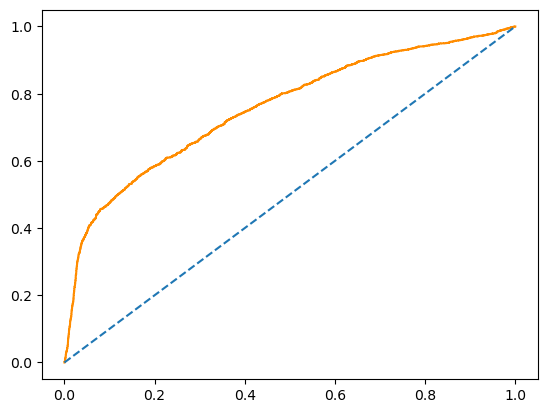

In [30]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test_new)

# Print the accuracy score the model
print(clf_logistic.score(X_test_new, y_test_new))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test_new, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test_new, prob_default)

the accuracy for this model is about 80% and the AUC score is 76%. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

1. Model discrimination and impact
We've looked at some ways to evaluate our logistic regression. Let's talk more about thresholds and their impact on portfolio performance.

2. Confusion matrices
Another way to analyze our model's performance is with the confusion matrix. These will show us all our correct and incorrect predictions for loan status. The confusion matrix has four sections: true positives, false positives, false negatives, and true negatives. We've looked at recall for defaults within classification reports. That formula and where it resides in the confusion matrix are shown here.

3. Default recall for loan status
The definition of default recall, also called sensitivity, is the proportion of actual positives correctly predicted. Before, we retrieved this value from the classification report without understanding how it's calculated. Recall is found by taking the number of true defaults and dividing it by the sum of true defaults and defaults predicted as non-default.

4. Recall portfolio impact
Let's look at the recall for defaults highlighted in red in a classification report. This is an example of a report from an under-performing Logistic Regression model. Here, the proportion of true defaults predicted by our model was only 4 percent.

5. Recall portfolio impact
Imagine that we have 50 thousand loans in our portfolio, and they each have a total loan amount of 50 dollars. As seen in the classification report, this model has a default recall of 4 percent. So, that means we correctly predicted 4 percent of defaults, and incorrectly predicted 96 percent of defaults. If all of our true default loans defaulted right now, our estimated loss from the portfolio would be 2.4 million dollars! This loss would be something we didn't plan for, and would be unexpected.

6. Recall, precision, and accuracy
When it comes to metrics like recall, precision, and accuracy, it can be challenging to find an optimum number for all three as a target. Have a look at this example graph of a logistic regression model on the credit data. The blue line, which is default recall, starts out really high. This is because if we predict all loans to be a default, we definitely predict all of our defaults correctly! You can also see that when default recall is high, more often than not non-default recall is low. Initially, we have to make a determination about what scores for each are good enough in order to set a baseline for performance.

In [31]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9040  154]
 [2179  413]]


In [32]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9040  154]
 [2179  413]]


In [33]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8489  705]
 [1428 1164]]


The value for default recall at this threshold is actually pretty high! 

How thresholds affect performance
Setting the threshold to 0.4 shows promising results for model evaluation. Now you can assess the financial impact using the default recall which is selected from the classification reporting using the function precision_recall_fscore_support().

For this, you will estimate the amount of unexpected loss using the default recall to find what proportion of defaults you did not catch with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

The average loan value, avg_loan_amnt has been calculated = 9583.600936895346 and made available in the workspace along with preds_df and y_test.

In [34]:
avg_loan_amnt = 9583.600936895346

In [35]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9868047.53692514


By our estimates, this loss would be around $9.8 million. That seems like a lot! Try rerunning this code with threshold values of 0.3 and 0.5

Threshold selection
You know there is a trade off between metrics like default recall, non-default recall, and model accuracy. One easy way to approximate a good starting threshold value is to look at a plot of all three using matplotlib. With this graph, you can see how each of these metrics look as you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

The threshold values thresh, default recall values def_recalls, the non-default recall values nondef_recalls and the accuracy scores accs have been loaded into the workspace. To make the plot easier to read, the array ticks for x-axis tick marks has been loaded as well.

In [36]:
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]

In [37]:
def_recalls = [0.7981438515081206, 0.7583139984532096, 0.7157772621809745, 0.6759474091260634, 0.6349574632637278, 0.594354215003867, 0.5467904098994586, 0.5054137664346481, 0.46403712296983757, 0.39984532095901004, 0.32211910286156226, 0.2354988399071926, 0.16782675947409126, 0.1148491879350348, 0.07733952049497293, 0.05529775715390565, 0.03750966744006187, 0.026295436968290797, 0.017788089713843776]

In [38]:
nondef_recalls = [0.5342465753424658, 0.5973037616873234, 0.6552511415525114, 0.708306153511633, 0.756468797564688, 0.8052837573385518, 0.8482278756251359, 0.8864970645792564, 0.9215046749293324, 0.9492280930637095, 0.9646662317895195, 0.9733637747336378, 0.9809741248097412, 0.9857577734290063, 0.9902152641878669, 0.992280930637095, 0.9948901935203305, 0.9966297021091541, 0.997499456403566]

In [39]:
accs = [0.5921588594704684, 0.6326374745417516, 0.6685336048879837, 0.7012050237610319, 0.7298031228784793, 0.7589952477936185, 0.7820773930753564, 0.8028682959945689, 0.8211133740665308, 0.8286659877800407, 0.8236591989137814, 0.811439239646979, 0.8025288526816021, 0.7946367956551256, 0.7898845892735913, 0.7866598778004074, 0.7847929395790902, 0.7836897488119484, 0.7825016972165648]

In [40]:
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

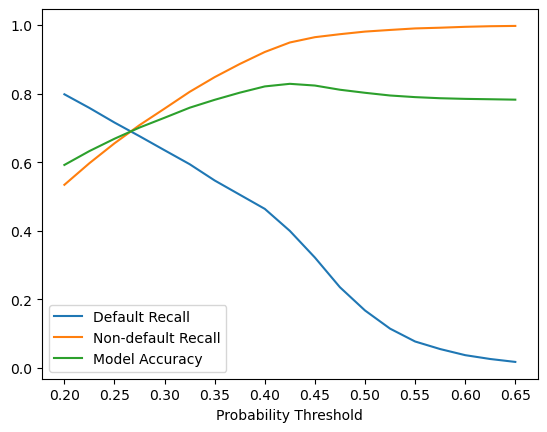

In [41]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

This is the easiest pattern to see on this graph, because it's the point where all three lines converge. This threshold would make a great starting point, but declaring all loans about 0.275 to be a default is probably not practical.

1. Gradient boosted trees with XGBoost
We've used many different ways to experiment with a logistic regression for probability of default. Now, let's have a look at gradient boosted decision trees using XGBoost.

2. Decision trees
So what is a decision tree? They are machine learning models which use decisions as steps in a process to eventually identify our loan status. While they produce predictions similar to logistic regressions, they are not structured the same way. Here is an example of a simple decision tree. The first box, or node, has decided to split the data into two groups. Those with an employment length above 10, and those below. Then it uses loan intent medical the same way. The results of these splits are yes and no decisions that eventually lead to a predicted loan status of default or non-default.

3. Decision trees for loan status
Let's have a look at a simple example of a decision tree on the loan data when what we are predicting is still defaults. Here, we have a red dot for each default, and a green dot for each non-default. The red shaded area is what our model predicted as default. While it predicted all of the defaults correctly, it predicted two non-defaults as default.

4. Decision tree impact
What are the consequences of this? Let's say both of these loans were worth 1500 and 1200 at the time we predicted their status. Then, maybe we decide to sell off all debt we think is likely to default for 250 per loan. As a result of the model, our loss is 2200 dollars for just two loans!

5. A forest of trees
XGBoost doesn't use just one decision tree though, but a large number of them in what's known as an ensemble through a method called gradient boosting. Each tree in the ensemble is like the one we just saw, and is a weak predictor. Have a look at this example. The first two boxes on the left represent two different individual models. Each of them predicts the defaults, but they also predict some non-defaults as defaults. However, when we use gradient boosting with XGBoost, we get the box on the right which combines the two weak models. In this example, the boosted model predicts all of the loans correctly.

6. Creating and training trees
The trees we will use are available within the xgboost package, and they train similar to logistic regression models. Here, we can see that the gradient boosted tree is created using the XGBClassifier function. Next, fit is called on the model the same as before and with the same training data.

7. Default predictions with XGBoost
These models predict the same way as the logistic regression do. We can use predict_proba to predict probabilities of default. The predict method gives us a value of 0 or 1 for loan status. The predict_proba method returns an array of probabilities for default and non-default. The predict method returns an array of the loan status.

8. Hyperparameters of gradient boosted trees
The models have parameters that are like settings that affect how a model learns. These settings are called hyperparameters. Hyperparameters cannot be learned from data; they have to be set by us. Let's look at a few of these hyperparameters. The learning rate tells the model how quickly it should learn in each step of the ensemble. The smaller the value, the more conservative it is at each step. The max depth tells the model how deep each tree can go. Keeping this value low ensures the model is not too complex.

Trees for defaults
You will now train a gradient boosted tree model on the credit data, and see a sample of some of the predictions. Do you remember when you first looked at the predictions of the logistic regression model? They didn't look good. 

In [42]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train_new, np.ravel(y_train_new))

# Predict with a model
gbt_preds_prob = clf_gbt.predict_proba(X_test_new)

# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test_new)

# Create dataframes of first five predictions, and first five true labels
xgb_preds_df = pd.DataFrame(gbt_preds_prob[:,1][0:], columns = ['prob_default'])
true_df = y_test_new

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), xgb_preds_df], axis = 1))

       loan_status  prob_default
0                0      0.069717
1                0      0.000514
2                0      0.001946
3                0      0.045644
4                0      0.432617
...            ...           ...
11781            0      0.041030
11782            1      0.998818
11783            1      0.981503
11784            0      0.002784
11785            1      0.943154

[11786 rows x 2 columns]


In [43]:
clf_gbt_preds_later= gbt_preds_prob[:, 1]
print(clf_gbt_preds_later)
preds_df_gbt_later=xgb_preds_df
print(preds_df_gbt_later)

[6.9717355e-02 5.1445863e-04 1.9455771e-03 ... 9.8150349e-01 2.7836582e-03
 9.4315362e-01]
       prob_default
0          0.069717
1          0.000514
2          0.001946
3          0.045644
4          0.432617
...             ...
11781      0.041030
11782      0.998818
11783      0.981503
11784      0.002784
11785      0.943154

[11786 rows x 1 columns]


In [44]:
# Reassign loan status based on the threshold
preds_df_gbt_later['loan_status'] = preds_df_gbt_later['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)
print(preds_df_gbt_later)

       prob_default  loan_status
0          0.069717            0
1          0.000514            0
2          0.001946            0
3          0.045644            0
4          0.432617            1
...             ...          ...
11781      0.041030            0
11782      0.998818            1
11783      0.981503            1
11784      0.002784            0
11785      0.943154            1

[11786 rows x 2 columns]


In [45]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
CR_gbt=(classification_report(y_test_new, preds_df_gbt_later['loan_status'], target_names=target_names))
print(CR_gbt)

              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9194
     Default       0.92      0.76      0.83      2592

    accuracy                           0.93     11786
   macro avg       0.93      0.87      0.90     11786
weighted avg       0.93      0.93      0.93     11786



The predictions don't look the same as with the LogisticRegression(). Worth noticing that this model is already accurately predicting the probability of default for some loans with a true value of 1 in loan_status

Gradient boosted portfolio performance
At this point you've looked at predicting probability of default using both a LogisticRegression() and XGBClassifier(). You've looked at some scoring and have seen samples of the predictions, but what is the overall affect on portfolio performance? Try using expected loss as a scenario to express the importance of testing different models.

A data frame called portfolio has been created to combine the probabilities of default for both models, the loss given default (assume 20% for now), and the loan_amnt which will be assumed to be the exposure at default.

### Expected Loss = PD* LGD* EAD
### expected_loss = prob_default* loss_given_default * loan_amnt


In [46]:
portfolio = xgb_preds_df.join(preds_df, how='outer', lsuffix='_gbt', rsuffix='_lr')

In [47]:
portfolio

,prob_default_gbt,loan_status_gbt,prob_default_lr,loan_status_lr
0,0.069717,0,0.129805,0
1,0.000514,0,0.243161,0
2,0.001946,0,0.100325,0
3,0.045644,0,0.252148,0
4,0.432617,1,0.377654,0
...,...,...,...,...
11781,0.041030,0,0.096698,0
11782,0.998818,1,0.520755,1
11783,0.981503,1,0.464550,1
11784,0.002784,0,0.049818,0


In [48]:
portfolio = portfolio.assign(lgd = 0.2)

In [49]:
portfolio = portfolio.join(X_test_new[['loan_amnt']].set_axis(portfolio.index))

In [50]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['prob_default_gbt'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['prob_default_lr'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

   prob_default_gbt  loan_status_gbt  prob_default_lr  loan_status_lr  lgd  \
0          0.069717                0         0.129805               0  0.2   
1          0.000514                0         0.243161               0  0.2   
2          0.001946                0         0.100325               0  0.2   
3          0.045644                0         0.252148               0  0.2   
4          0.432617                1         0.377654               0  0.2   

   loan_amnt  
0       9000  
1      11000  
2       3700  
3      10800  
4       7500  
LR expected loss:  5483470.775015298
GBT expected loss:  5299601.5916693155


It looks like the total expected loss for the XGBClassifier() model is quite a bit lower. When we talk about accuracy and precision, the goal is to generate models which have a low expected loss. Looking at a classification_report() helps as well

In [51]:
# Creating pandas dataframe from numpy array
gbt_preds_df = pd.DataFrame(gbt_preds)
gbt_preds_df.columns = ['prob_default']
print(gbt_preds_df)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test_new, gbt_preds_df, target_names=target_names))

       prob_default
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
11781             0
11782             1
11783             1
11784             0
11785             1

[11786 rows x 1 columns]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9194
     Default       0.96      0.74      0.84      2592

    accuracy                           0.94     11786
   macro avg       0.94      0.87      0.90     11786
weighted avg       0.94      0.94      0.93     11786



Aftere have=ing a look at the precision and recall scores! Remember the low default recall values obtained from the LogisticRegression()? This model already appears to have serious potential.

1. Column selection for credit risk
We've trained logistic regression models and gradient boosted trees now. But does selecting specific columns affect model performance?

2. Choosing specific columns
When we first started working with logistic regression models, we used only a few columns. Now, we've been using all of the columns, but how do we know which are the most important for accurately predicting probability of default? For logistic regression models, we were looking at the coefficient of each column and interpreting that coefficient as a weight or measure of importance. But what do we use for our gradient boosted trees?

3. Column importances
The first easy way to tell which columns are important is to check the feature importances using the get booster and get score methods together. For this course we will focus on the weight type, which shows how many times the column appears in all the models' trees. Once we've trained a model, we are able to see the feature importances by calling these two methods in sequence This returns is a dictionary of each column's name with the weight number as shown here.

4. Column importance interpretation
These were the importance values we looked at in the last example, but how do we interpret this? In this example, our model created two trees which were gradient boosted. Our column importance for person home ownership was 2, and we can see here that the column appears in both trees. The person home ownership rent is only in one of the trees, so it's column importance is one.

5. Plotting column importances
We can also visualize the column importances with the plot importance function in xgboost. We call this function and pass in our model to see a nice visualization of the importances. In this example, our model created 400 trees, and the person_income column was used 315 times across all of them. So, 315 of the 400 trees used person_income.

6. Choosing training columns
Once we have the importances for each column, to determine if we want to create a new training set with only select columns. Different combinations of these columns will affect the overall performance Consider this example. We have two training sets. One has loan interest rate and employment length, while the other has these two columns and the loan's percentage of the person's income. In this example, adding another column improves the accuracy, but changes the importance of the other two columns and reduces default recall. Sometimes adding more columns increases accuracy, but it can also make it more difficult for the model to learn and decrease other performance metrics like default recall.

7. F1 scoring for models
It can be difficult to use two metrics like accuracy and recall to gauge a model's performance. Fortunately, there is already a defined metric that combines both of these two into one. This metric is the F1 score. This is a combination of both precision and recall. This is useful because it helps us keep recall for loan defaults as an important consideration for any model. The formula, as shown here, is two times the product of the precision and recall divided by their sum. The great thing is that this number already shows up in a classification report. Here, we see the F1-score numbers for both defaults and non-defaults.

Column importance and default prediction
When using multiple training sets with many different groups of columns, it's important to keep and eye on which columns matter and which do not. It can be expensive or time-consuming to maintain a set of columns even though they might not have any impact on loan_status.


Train an XGBClassifier() model on this data, and check the column importance to see how each one performs to predict loan_status.

In [52]:
#The X data for this exercise was created with the following code:

X_new1 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income','loan_amnt', 'person_home_ownership_MORTGAGE','loan_grade_F']]
y_new1 = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train_new1, X_test_new1, y_train_new1, y_test_new1 = train_test_split(X_new1, y_new1, test_size=.4, random_state=123)

In [53]:
# Create and train the model on the training data
clf_gbt_new1 = xgb.XGBClassifier().fit(X_train_new1,np.ravel(y_train_new1))

# Print the column importances from the model
print(clf_gbt_new1.get_booster().get_score(importance_type = 'weight'))

{'person_income': 1299.0, 'loan_int_rate': 994.0, 'loan_percent_income': 585.0, 'loan_amnt': 533.0, 'person_home_ownership_MORTGAGE': 115.0, 'loan_grade_F': 17.0}


So, the importance for loan_grade_F is only 17 in this case. This could be because there are so few of the F-grade loans. While the F-grade loans don't add much to predictions here, they might affect the importance of other training columns.

Visualizing column importance
When the model is trained on different sets of columns it changes the performance, but does the importance for the same column change depending on which group it's in?

Understanding how different columns are used to arrive at a loan_status prediction is very important for model interpretability.

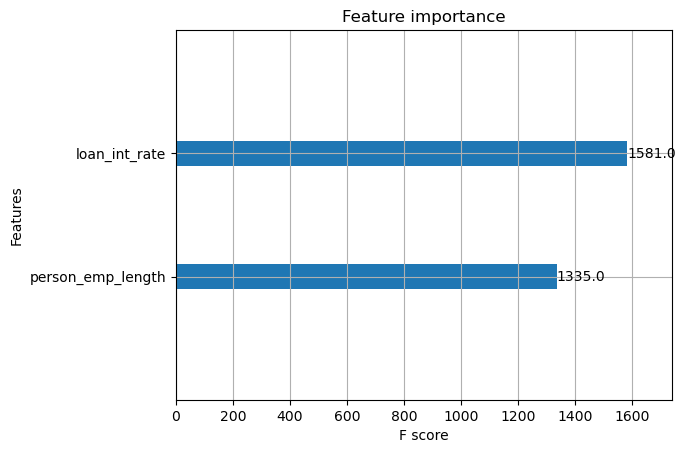

In [54]:
# The data sets X2col and X3col have been created with the following code:
X2col = cr_loan_prep[['loan_int_rate','person_emp_length']]

# Use test_train_split to create the training and test sets
X2col_train, X2col_test, y2_train_new1, y2_test_new1 = train_test_split(X2col, y_new1, test_size=.4, random_state=123)

# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2col_train,np.ravel(y2_train_new1))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

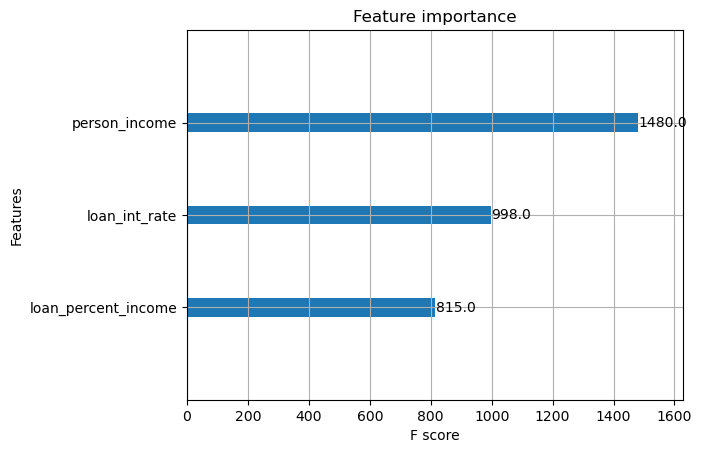

In [55]:
X3col = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

# Use test_train_split to create the training and test sets
X3col_train, X3col_test, y3_train_new1, y3_test_new1 = train_test_split(X3col, y_new1, test_size=.4, random_state=123)

# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3col_train,np.ravel(y3_train_new1))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

On taking closer look - the importance of loan_int_rate went from 1581 to 998. Initially, this was the most important column, but person_income ended up taking the top spot here.

Column selection and model performance
Creating the training set from different combinations of columns affects the model and the importance values of the columns. Does a different selection of columns also affect the F-1 scores, the combination of the precision and recall, of the model? You can answer this question by training two different models on two different sets of columns, and checking the performance.

Inaccurately predicting defaults as non-default can result in unexpected losses if the probability of default for these loans was very low. You can use the F-1 score for defaults to see how the models will accurately predict the defaults.

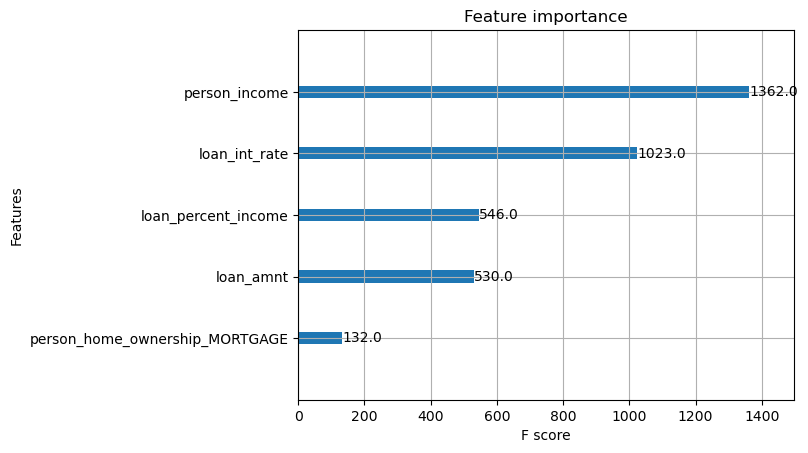

              precision    recall  f1-score   support

 Non-Default       0.91      0.96      0.93      9194
     Default       0.83      0.65      0.73      2592

    accuracy                           0.89     11786
   macro avg       0.87      0.81      0.83     11786
weighted avg       0.89      0.89      0.89     11786



In [56]:
X4col = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income','loan_amnt', 'person_home_ownership_MORTGAGE' ]]

# Use test_train_split to create the training and test sets
X4col_train, X4col_test, y4_train_new1, y4_test_new1 = train_test_split(X4col, y_new1, test_size=.4, random_state=123)

# Train a model on the X data with columns
clf_gbt4 = xgb.XGBClassifier().fit(X4col_train,np.ravel(y4_train_new1))

# Predict the loan_status using each model
gbt_preds4 = clf_gbt4.predict(X4col_test)

# Plot the column importance for this model
xgb.plot_importance(clf_gbt4, importance_type = 'weight')
plt.show()


# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y4_test_new1, gbt_preds4, target_names=target_names))

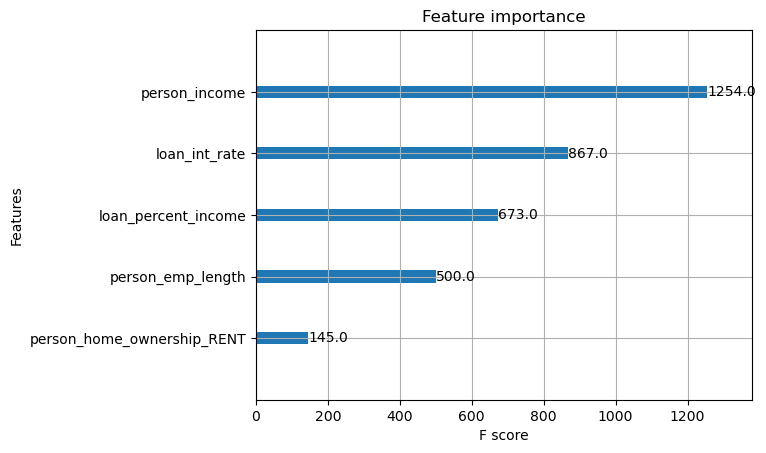

              precision    recall  f1-score   support

 Non-Default       0.91      0.98      0.94      9194
     Default       0.91      0.65      0.75      2592

    accuracy                           0.91     11786
   macro avg       0.91      0.81      0.85     11786
weighted avg       0.91      0.91      0.90     11786



In [57]:
X5col = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income','person_emp_length', 'person_home_ownership_RENT' ]]

# Use test_train_split to create the training and test sets
X5col_train, X5col_test, y5_train_new1, y5_test_new1 = train_test_split(X5col, y_new1, test_size=.4, random_state=123)

# Train a model on the X data with columns
clf_gbt5 = xgb.XGBClassifier().fit(X5col_train,np.ravel(y5_train_new1))

# Predict the loan_status using each model
gbt_preds5 = clf_gbt5.predict(X5col_test)

# Plot the column importance for this model
xgb.plot_importance(clf_gbt5, importance_type = 'weight')
plt.show()

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y5_test_new1, gbt_preds5, target_names=target_names))

it looked like the selection of columns affected model accuracy the most, but now we see that the selection of columns also affects recall by quite a bit.

1. Cross validation for credit models
As we select different hyperparameters and columns for our models, how do we know how they will perform over time? This is where we use cross validation to test our models to see how they might perform after we implement them.

2. Cross validation basics
But what is cross validation? Simply put, it is a method for training and testing a model multiple times on the same data. We cannot create more loan data to help us develop our model, but we can use cross validation to simulate how our model will perform on new loan data before it comes in. Within XGBoost, to use cross validation you need to create a specialized object called dmatrix, which is just a different way of storing the training data. We also need to use early stopping to keep the models robust. This tells cross validation to stop when the score of the model has not improved after a set number of iterations.

3. How cross validation works
Here's how cross validation works. What we do is take the entire set of training data and create pieces, called folds, from it. All but one of the folds are used for training, and the remaining fold is used as a kind of miniature test set. Once testing on all folds is completed, the model is tested against the actual test set. We've created 5 folds. Now what happens is the model is trained on 4 of the folds, and tested against the final fold. This process repeats through 5 splits so that each fold is used for testing at least once. Once this is done, the parameters are averaged across each training session and then the model is finally tested against the original test set.

1 https://scikit-learn.org/stable/modules/cross_validation.html
4. Setting up cross validation within XGBoost
Here is how we use cross validation from within xgboost. First, we set the number of folds. Then, we set the number of iterations we will allow before the simulations stop. Next, we create a dictionary of parameters. The binary logistic parameter we created tells xgboost that we want to predict a 0 or 1 for loan status. The performance metric here is the area under the curve. This is the same metric we used on the logistic regression models.

5. Using cross validation within XGBoost
After creating the dictionary of parameters, we transform our training data into the specialized dmatrix object for xgboost. Last, we call the cv function and pass in the data long with all the parameters dictionary.

6. The results of cross validation
What the cv function produces is a data frame of training and test AUC scores for our model. Think of this as a scenario analysis where we want to see how our model would perform as new loans come in. Here we see that the auc for the test and train set improves as the model trains on each fold. This suggests that the performance will be stable.

7. Cross validation scoring
Within scikit-learn there is another helpful function that combines cross validation, and the accuracy scoring metrics we've seen so far. This is the cross val score function. This is used to automatically perform cross validation with data splitting, model training, and scoring all at once! This function comes from the model selection module and is used like this. We first pass in the model, the training data, the training labels, and then the number of folds for cross validation. There are other ways to use this, but when cv is a number, it automatically uses folds. The result is an array of scores for each iteration of training and scoring.

Cross validating credit models
Credit loans and their data change over time, and it won't always look like what's been loaded into the current test sets. So, you can use cross-validation to try several smaller training and test sets which are derived from the original X_train and y_train.

Use the XGBoost function cv() to perform cross-validation. You will need to set up all the parameters for cv() to use on the test data.

In [58]:
params ={'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

In [59]:
# Set the values for number of folds and stopping iterations
n_folds = 10
early_stopping = 100

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train_new, label = y_train_new)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 600, nfold=n_folds, shuffle = True)

# Print the cross validations data frame
print(cv_df)

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.896007       0.002084       0.891142      0.013071
1          0.903197       0.001911       0.897610      0.011157
2          0.911369       0.001791       0.904430      0.011304
3          0.915447       0.001476       0.907551      0.010186
4          0.920176       0.001249       0.911863      0.009559
..              ...            ...            ...           ...
595        1.000000       0.000000       0.943436      0.005216
596        1.000000       0.000000       0.943436      0.005166
597        1.000000       0.000000       0.943468      0.005160
598        1.000000       0.000000       0.943479      0.005143
599        1.000000       0.000000       0.943455      0.005183

[600 rows x 4 columns]


see how the AUC for both train-auc-mean and test-auc-mean improves at each iteration of cross-validation. It appreas that as the iterations progress the scores get better, but will they eventually reach 1.0

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.896007       0.002084       0.891142      0.013071
1        0.903197       0.001911       0.897610      0.011157
2        0.911369       0.001791       0.904430      0.011304
3        0.915447       0.001476       0.907551      0.010186
4        0.920176       0.001249       0.911863      0.009559
0.94


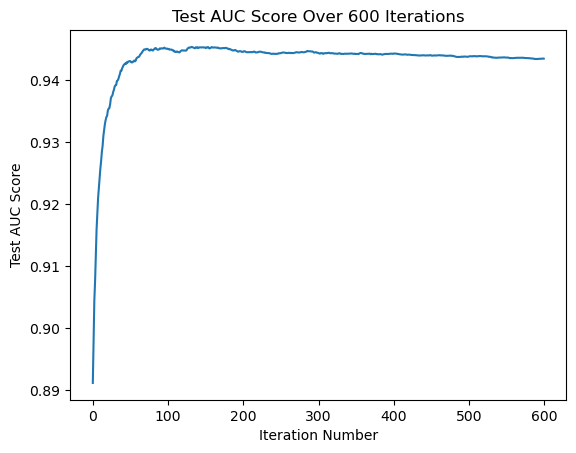

In [60]:
# Print the first five rows of the CV results data frame
print(cv_df.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_df['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_df['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

Notice that the test AUC score never quite reaches 1.0 and begins to decrease slightly after 100 iterations. This is because this much cross-validation can actually cause the model to become overfit. So, there is a limit to how much cross-validation one should to

Cross-validation scoring
Now, you should use cross-validation scoring with cross_val_score() to check the overall performance.

This is exercise presents an excellent opportunity to test out the use of the hyperparameters learning_rate and max_depth. Remember, hyperparameters are like settings which can help create optimum performance.

In [61]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train_new, np.ravel(y_train_new), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.93574661 0.92986425 0.93506787 0.92984838]
Average accuracy: 0.93 (+/- 0.01)


With only a couple of hyperparameters and cross-validation, we can get the average accuracy up to 93%. This is a great way to validate how robust the model is.

1. Class imbalance in loan data
We just used cross-validation to check the robustness of our model. Let's talk more about how the data impacts the robustness of the model.

2. Not enough defaults in the data
In our credit data, the values for loan status are our classes. By looking at the value counts, we see that the number of defaults and non-defaults is not equal. In the training data, the defaults account for 22%. So, there are far more non-defaults than defaults. This is class imbalance, which is a problem.

3. Model loss function
Our tree models use a loss function called log-loss. Our model will want to predict both classes accurately as this leads to an overall better score. Here, we have one default and one non-default. Each has a predicted probability far away from the actual loan status. With the log-loss function, both result in the same value. So, for our model each is equally bad. The problem is, for loans, a default predicted to be a non-default is much more costly.

4. The cost of imbalance
Let's say we have two loans for a thousand dollars each. One is a non-default predicted as default, and the other is a default predicted as non-default. Here, each has a potential profit of 10 dollars. If we deny a loan because we think it's a default when it isn't, we miss out on 10 dollars. If we accept a loan because we think it's a non-default when it is a default, we could lose a thousand dollars. For the model, each of these is equally bad. For our portfolio, that is definitely not the case.

5. Causes of imbalance
What causes class imbalance can be several different things. One is there might be some issues with the data itself. Maybe the training data was not sampled correctly. For us, the imbalance is perfectly normal. People have incentives to not default on loans. One example is the less often they default, their credit rating goes up and they are able to purchase more things.

6. Dealing with class imbalance
So, how can we deal with class imbalance? One way is to gather more data. However, if it remains normal for people to not default on loans, it's unlikely that the percentage of defaults will change. Another way is to penalize the classification differently. This would have models weight inaccurately predicted defaults more. However, this can require frequent model parameter tuning and maintenance for the life of the model. We will use the simplest method, which is to sample the training data differently.

7. Undersampling strategy
The type of sampling we are going to perform is called undersampling. What we will do is take a random sample of non-defaults and combine it with our defaults. Imagine we have 100 loans where 80% are non-defaults. We will randomly sample only 20 of our non-defaults, and combine that with our set of 20 defaults. With this, we have a balanced training set of 20 defaults and 20 non-defaults.

8. Combining the split data sets
So here is the way we undersample our training data. First we concatenate our X and y training sets because we separated them for our model, but now we need to change the training data as a whole. Then we store the counts for defaults and non-defaults. After that, we create two new data sets. One with only defaults and one with only non-defaults.

9. Undersampling the non-defaults
With that done, we randomly sample our non-defaults to be the same number of loans as our defaults. Then, we concatenate the two data sets together, and we have a balanced training set!

Undersampling training data
It's time to undersample the training set yourself with a few lines of code from Pandas. Once the undersampling is complete, you can check the value counts for loan_status to verify the results.


In [62]:
# X_y_train, count_nondefault, and count_default

X_y_train = pd.concat([X_train_new.reset_index(drop = True),
                       y_train_new.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [63]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

0    3872
1    3872
Name: loan_status, dtype: int64


In [64]:
X_y_train_under

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,21,53000,5.0,18000,13.80,0.34,3,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,24,60000,4.0,12000,7.90,0.20,3,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,25,100000,9.0,17600,10.59,0.18,3,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,26,84996,4.0,3600,11.99,0.04,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,33,144000,1.0,5000,8.90,0.03,10,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,25,12816,0.0,3000,12.87,0.23,4,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3868,23,24000,4.0,12250,13.16,0.51,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3869,27,60000,12.0,2000,15.70,0.03,6,1,0,0,...,0,0,0,1,0,0,0,0,1,1
3870,41,43439,4.0,15000,12.73,0.35,15,0,0,0,...,0,0,1,0,0,0,0,1,0,1


Training set has an even number of defaults and non-defaults. Let's test out some machine learning models on this new undersampled data set and compare their performance to the models trained on the regular data set.

Undersampled tree performance
You've undersampled the training set and trained a model on the undersampled set.

The performance of the model's predictions not only impact the probability of default on the test set, but also on the scoring of new loan applications as they come in. You also now know that it is even more important that the recall of defaults be high, because a default predicted as non-default is more costly.

The next crucial step is to compare the new model's performance to the original model. The original predictions are stored as gbt_preds and the new model's predictions stored as gbt2_preds.
The test set represents the type of data that will be seen by the model in the real world, so changing it would test the model on unrealistic data.

In [65]:
# Create the X and y data sets
X_UnderSample = X_y_train_under[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']]
y_UnderSample = X_y_train_under[['loan_status']]

# Use test_train_split to create the training and test sets
X_train_UnderSample, X_test_UnderSample, y_train_UnderSample, y_test_UnderSample = train_test_split(X_UnderSample, y_UnderSample, test_size=.4, random_state=123)

In [66]:
# Train a model
clf_gbt_UnderSample = xgb.XGBClassifier().fit(X_train_UnderSample, np.ravel(y_train_UnderSample))

# Predict the labels for loan status
gbt_preds_UnderSample = clf_gbt_UnderSample.predict(X_test_UnderSample)

In [67]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test_new, gbt_preds, target_names=target_names))
print(classification_report(y_test_UnderSample, gbt_preds_UnderSample, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9194
     Default       0.96      0.74      0.84      2592

    accuracy                           0.94     11786
   macro avg       0.94      0.87      0.90     11786
weighted avg       0.94      0.94      0.93     11786

              precision    recall  f1-score   support

 Non-Default       0.83      0.88      0.85      1563
     Default       0.87      0.81      0.84      1535

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



In [68]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test_new,gbt_preds))
print(confusion_matrix(y_test_UnderSample,gbt_preds_UnderSample))

[[9106   88]
 [ 669 1923]]
[[1374  189]
 [ 286 1249]]


In [69]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test_new, gbt_preds))
print(roc_auc_score(y_test_UnderSample, gbt_preds_UnderSample))

0.866163344250276
0.846379738288308


Looks like this is classified as a success! This means overall it predicts defaults much more accurately

1. Model evaluation and implementation
We've fully developed two models to predict the probability of default, and we need to use many different metrics to compare them to ensure we select the best one.

2. Comparing classification reports
First, we will use classification reports. For comparison, we will look at two side-by-side and focus on one metric, the macro average F-1 score. The calculation behind the F1 score combines precision and recall to create a single metric and is shown here. The unweighted average of the F1 scores for default and non-default is the macro average F1 score. With this, we can use a single number to get a good understanding of each models' performance across defaults and non-defaults.

3. ROC and AUC analysis
We will also use ROC charts and AUC scores. The ROC chart will have a line for each model which allows us to compare the lift for both. The greater the lift means that the AUC score is higher and the model has better performance overall for defaults and non-defaults. In this example, we see two models compared to the random prediction going through the middle. Here, the gradient boosted tree model has more lift, and will have a higher AUC score.

4. Model calibration
Another method we will use to compare models is to check how well calibrated their predicted probabilities are. What this means is we want to be able to interpret these probabilities as a confidence level for default. A model is well-calibrated when a sample of loans has an average predicted probability of default close to that sample's percentage of actual defaults. For example, if we take 10 loans and their average predicted probability of default is 0.12, we expect 12% of the sample to be defaults. If our model has an average predicted probability of default of 0.25 and that sample is 65% defaults, then we have several loans that we predicted to be non-default that are actually defaults which we are very costly.

1 http://datascienceassn.org/sites/default/files/Predicting%20good%20probabilities%20with%20supervised%20learning.pdf
5. Calculating calibration
To calculate these values we use the calibration curve function. It is imported from the sci-kit learn package like this, and is used on the test set and the predicted probabilities of default. The n-bins parameter sets the number of samples to take. So, with this example, our test data is split into 5 samples and the function will calculate the average predicted probability of default and percentage of true defaults for each sample.

6. Plotting calibration curves
With the outputs from the calibration curve function, we make a calibration curve plot by calling the plot function from matplotlib. The result plots all our average predicted probabilities against all our percentage of actual defaults for each sample. Here, I used 20 samples.

7. Checking calibration curves
To interpret this plot, let's look at two different events. One where the model is above the perfectly calibrated line, and one where it's below.

8. Calibration curve interpretation
In this event, we see that our average predicted probability of default was 0.56, but this sample contained 75% defaults. Here is where we find the majority of our false negatives, which are quite costly. Our model is having a difficult time accurately predicting the probability of default for the loans in this sample.

9. Calibration curve interpretation
In the second event, the model's average predicted probability for the sample is 0.94 but the sample is only 66% defaults. Here we will find most of our false positives. These are missed opportunities for profit, but are not as damaging as the false negatives.

Comparing model reports
You've used logistic regression models and gradient boosted trees. It's time to compare these two to see which model will be used to make the final predictions.

One of the easiest first steps for comparing different models' ability to predict the probability of default is to look at their metrics from the classification_report(). With this, you can see many different scoring metrics side-by-side for each model. Because the data and models are normally unbalanced with few defaults, focus on the metrics for defaults for now.

In [70]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test_new, preds_df_lr_later['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test_new, preds_df_gbt_later['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test_new,preds_df_lr_later['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test_new,preds_df_gbt_later['loan_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9194
     Default       0.62      0.45      0.52      2592

    accuracy                           0.82     11786
   macro avg       0.74      0.69      0.71     11786
weighted avg       0.80      0.82      0.81     11786

              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9194
     Default       0.92      0.76      0.83      2592

    accuracy                           0.93     11786
   macro avg       0.93      0.87      0.90     11786
weighted avg       0.93      0.93      0.93     11786

0.7051224860306248
0.8963682684237266


There is a noticeable difference between these two models. One can see that the scores from the classification_report() are all higher for the gradient boosted tree. This means the tree model is better in all of these aspects. 

Comparing with ROCs
One should use ROC charts and AUC scores to compare the two models. Sometimes, visuals can really help you and potential business users understand the differences between the various models under consideration.

With the graph in mind, you will be more equipped to make a decision. The lift is how far the curve is from the random prediction. The AUC is the area between the curve and the random prediction. The model with more lift, and a higher AUC, is the one that's better at making predictions accurately.

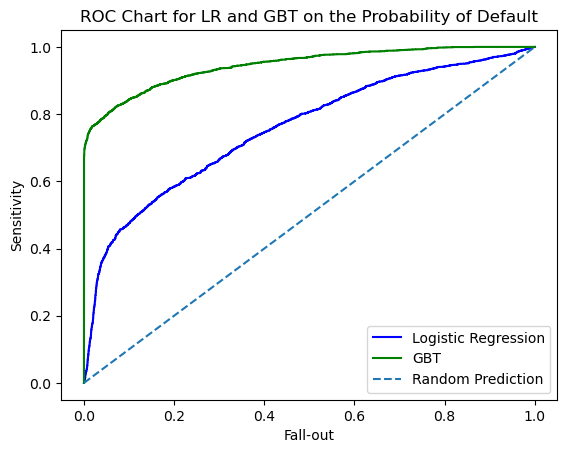

In [71]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test_new, clf_logistic_preds_later)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test_new, clf_gbt_preds_later)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [72]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test_new, clf_logistic_preds_later))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test_new, clf_gbt_preds_later))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.95


In [73]:
preds_df_gbt_later

,prob_default,loan_status
0,0.069717,0
1,0.000514,0
2,0.001946,0
3,0.045644,0
4,0.432617,1
...,...,...
11781,0.041030,0
11782,0.998818,1
11783,0.981503,1
11784,0.002784,0


In the ROC curve for the gradient boosted tree. Not only is the lift much higher, the calculated AUC score is also quite a bit higher. It's beginning to look like the gradient boosted tree is best

Acceptance rates
Setting an acceptance rate and calculating the threshold for that rate can be used to set the percentage of new loans you want to accept. For this exercise, assume the test data is a fresh batch of new loans. You will need to use the quantile() function from numpy to calculate the threshold.

The threshold should be used to assign new loan_status values. The number of defaults and non-defaults in the data change

In [74]:
# Check the statistics of the probabilities of default
print(preds_df_gbt_later['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(preds_df_gbt_later['prob_default'], 0.85)

# Apply acceptance rate threshold
preds_df_gbt_later['pred_loan_status'] = preds_df_gbt_later['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(preds_df_gbt_later['pred_loan_status'].value_counts())

count    11786.000000
mean         0.212839
std          0.344421
min          0.000002
25%          0.008941
50%          0.041768
75%          0.181321
max          1.000000
Name: prob_default, dtype: float64
0    10018
1     1768
Name: pred_loan_status, dtype: int64


In the results of .describe() One can see how it's not until 75% that you start to see double-digit numbers? That's because the majority of our test set is non-default loans. 

Visualizing quantiles of acceptance
You know how quantile() works to compute a threshold, and you've seen an example of what it does to split the loans into accepted and rejected. What does this threshold look like for the test set, and how can you visualize it?

To check this, you can create a histogram of the probabilities and add a reference line for the threshold. With this, you can visually show where the threshold exists in the distribution.

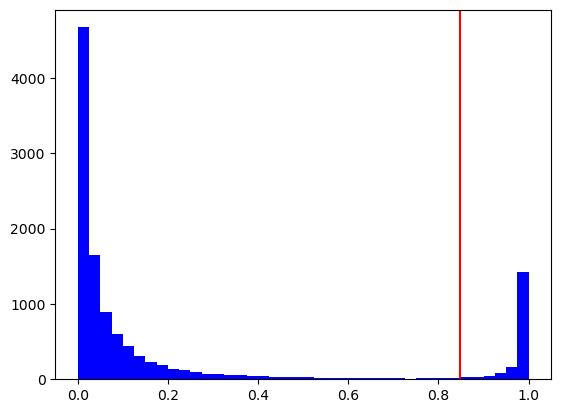

In [75]:
# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds_later, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds_later, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

One can see where the threshold is on the range of predicted probabilities. Not only can you see how many loans will be accepted (left side), but also how many loans will be rejected (right side).

Bad rates
With acceptance rate in mind, you can now analyze the bad rate within the accepted loans. This way you will be able to see the percentage of defaults that have been accepted.

Think about the impact of the acceptance rate and bad rate. We set an acceptance rate to have fewer defaults in the portfolio because defaults are more costly. Will the bad rate be less than the percentage of defaults in the test data?

In [76]:
# Print the top 5 rows of the new data frame
print(preds_df_gbt_later.head())

# Create a subset of only accepted loans
accepted_loans = preds_df_gbt_later[preds_df_gbt_later['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['loan_status']) / accepted_loans['loan_status'].count())

   prob_default  loan_status  pred_loan_status
0      0.069717            0                 0
1      0.000514            0                 0
2      0.001946            0                 0
3      0.045644            0                 0
4      0.432617            1                 0
0.03803154322220004


In [77]:
X_test_new['loan_amnt']
preds_df_gbt_later

,prob_default,loan_status,pred_loan_status
0,0.069717,0,0
1,0.000514,0,0
2,0.001946,0,0
3,0.045644,0,0
4,0.432617,1,0
...,...,...,...
11781,0.041030,0,0
11782,0.998818,1,1
11783,0.981503,1,1
11784,0.002784,0,0


In [78]:
preds_df_gbt_later['loan_amnt'] = X_test_new['loan_amnt'].set_axis(preds_df_gbt_later.index)
preds_df_gbt_later

,prob_default,loan_status,pred_loan_status,loan_amnt
0,0.069717,0,0,9000
1,0.000514,0,0,11000
2,0.001946,0,0,3700
3,0.045644,0,0,10800
4,0.432617,1,0,7500
...,...,...,...,...
11781,0.041030,0,0,12000
11782,0.998818,1,1,8000
11783,0.981503,1,1,11900
11784,0.002784,0,0,10000


In [79]:
# Print the statistics of the loan amount column

print(preds_df_gbt_later['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(preds_df_gbt_later['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(preds_df_gbt_later['loan_status'],
                 preds_df_gbt_later['pred_loan_status']).apply(lambda x: x * avg_loan, axis = 0))

count    11786.000000
mean      9524.917275
std       6219.271738
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
pred_loan_status              0              1
loan_status                                   
0                $91,791,627.78          $0.00
1                 $3,628,993.48 $16,840,053.74


One can see that our bad rate of about 3.8% represents an estimated loan value of about 3.62 million dollars. This may seem like a lot at first, but compare it to the total value of non-default loans! 

1. Credit strategy and minimum expected loss
We've looked at acceptance rates to calculate thresholds and we calculated bad rates to see how many defaults are accepted. Now, let's talk about how we test many different acceptance rates and how we can estimate total expected loss.

2. Selecting acceptance rates
Previously, we selected an acceptance rate of 85%. What if we don't know what values to set? To discover the bad rate an impact of each acceptance rate we could calculate all the values manually, or we could calculate them automatically and create a table. This table is referred to as the strategy table because we can choose our acceptance rate based on our overall strategy for the loan portfolio.

3. Setting up the strategy table
Before we begin calculating all the values for the strategy table, we first set up objects to store the values. Here, we create a list of all the acceptance rates to test. We also have two empty lists to store the thresholds and bad rates.

4. Calculating the table values
To create the table, we use a for loop to perform all of the calculations automatically and store the results. So, for each acceptance rate we define, we calculate the threshold, store it for later, apply it to the loans, create a subset called accepted loans, and then calculate and store the bad rate.

5. Strategy table interpretation
Once the for loop completes we can create a data frame for the strategy table which contains the values from each of the lists we made before. If we decided on an acceptance rate of 90%, then here we can see the threshold and bad rate for that acceptance rate. We accept only 90% of new loans, and reject the top 10% which gives us a threshold of 0.947. If we assume our test set loans are new loans not seen before, then we have an estimated bad rate of 13%.

6. Adding accepted loans
To make the strategy table more useful, we are going to add a few columns. The first is the number of accepted loans. This shows us how many new loans we accept for each acceptance rate.

7. Adding average loan amount
Next, we add an average loan value that we will use later. This is just the average loan amount from the test set.

8. Estimating portfolio value
Finally, the estimated value is difference between the average value of the accepted non-defaults minus the average value of accepted defaults. Remember, the accepted defaults is represented as a percentage which is the bad rate. Here, I assume each default in our accepted loans is a loss of the average amount of all loans. This gives a rough estimate for the portfolio value at each acceptance rate. So, if I choose an acceptance rate of 95% then my bad rate is 17.7%. If my acceptance rate is 85% then my bad rate is 9%. There is a trade-off between acceptance and bad rate. With this new table, we can estimate the difference.

9. Total expected loss
The final way we will measure the financial impact of our predictions is with total expected loss. This represents how much we expect to lose on loan defaults given their probability of default. We will take the product of the probability of default, loss given default, and exposure at default for each loan, and sum it. Within our predictions data frame we will use the probability of default from prob_default, the exposure will be assumed as the total loan value, and the loss given default will be 1 for a total loss on the loan.

Making the strategy table
Before you implement a strategy, you should first create a strategy table containing all the possible acceptance rates you wish to look at along with their associated bad rates and threshold values. This way, you can begin to see each part of your strategy and how it affects your portfolio.

Automatically calculating all of these values only requires a for loop, but requires many lines of python code. Don't worry, most of the code is already there. Remember the calculations for threshold and bad rate.

In [80]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

but look at this sweet strategy table in place now. This uses our specific predictions on the credit data, and can be used to see the acceptance rates, bad rates, and financial impact all at once. One of these values has the highest estimated value

In [81]:
thresholds = [1.000,0.992,0.976,0.804,0.254,0.178,0.138,0.111,0.093,0.078,0.066,0.055,0.045,0.037,0.030,0.022,0.015,0.008,0.004,0.002]

In [82]:
bad_rates1 = [0.219,0.179,0.132,0.083,0.061,0.052,0.043,0.036,0.030,0.027,0.023,0.020,0.017,0.014,0.010,0.008,0.005,0.001,0.000,0.000]

In [83]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates1),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0             $1.00      $1.00     $0.22
1             $0.95      $0.99     $0.18
2             $0.90      $0.98     $0.13
3             $0.85      $0.80     $0.08
4             $0.80      $0.25     $0.06
5             $0.75      $0.18     $0.05
6             $0.70      $0.14     $0.04
7             $0.65      $0.11     $0.04
8             $0.60      $0.09     $0.03
9             $0.55      $0.08     $0.03
10            $0.50      $0.07     $0.02
11            $0.45      $0.06     $0.02
12            $0.40      $0.04     $0.02
13            $0.35      $0.04     $0.01
14            $0.30      $0.03     $0.01
15            $0.25      $0.02     $0.01
16            $0.20      $0.01     $0.01
17            $0.15      $0.01     $0.00
18            $0.10      $0.00     $0.00
19            $0.05      $0.00     $0.00


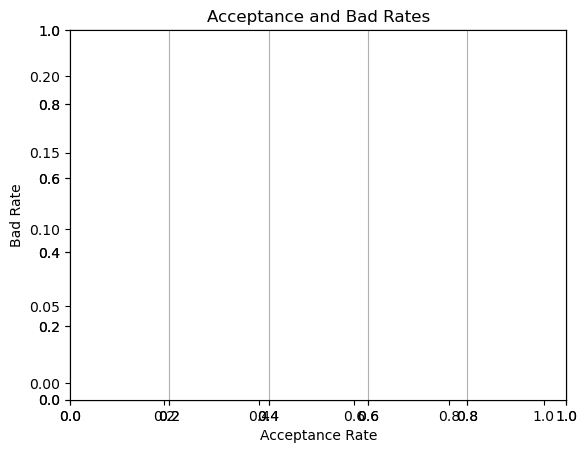

In [84]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

The boxplot shows us the distribution for each column. Look at the strategy curve. The bad rates are very low up until the acceptance rate 0.6 where they suddenly increase. This suggests that many of the accepted defaults may have a prob_default value between 0.6 and 0.8

In [85]:
# Print the contents of the strategy df
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0             $1.00      $1.00     $0.22
1             $0.95      $0.99     $0.18
2             $0.90      $0.98     $0.13
3             $0.85      $0.80     $0.08
4             $0.80      $0.25     $0.06
5             $0.75      $0.18     $0.05
6             $0.70      $0.14     $0.04
7             $0.65      $0.11     $0.04
8             $0.60      $0.09     $0.03
9             $0.55      $0.08     $0.03
10            $0.50      $0.07     $0.02
11            $0.45      $0.06     $0.02
12            $0.40      $0.04     $0.02
13            $0.35      $0.04     $0.01
14            $0.30      $0.03     $0.01
15            $0.25      $0.02     $0.01
16            $0.20      $0.01     $0.01
17            $0.15      $0.01     $0.00
18            $0.10      $0.00     $0.00
19            $0.05      $0.00     $0.00


In [ ]:
Estimated value profiling
The strategy table, strat_df, can be used to maximize the estimated portfolio value and minimize expected loss. Extending this table and creating some plots can be very helpful to this end.

The strat_df data frame is loaded and has been enhanced already with the following columns:

Column	Description
Num Accepted Loans	The number of accepted loans based on the threshold
Avg Loan Amnt	The average loan amount of the entire test set
Estimated value	The estimated net value of non-defaults minus defaults

credit data and our estimated averag loan value, we clearly see that the acceptance rate 0.85 has the highest potential estimated value. Normally, the allowable bad rate is set, but we can use analyses like this to explore other options